In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np

df_train = pd.read_csv('../../../Deceptive_Opinion_Spam_Corpus_Datasets/deceptive_training_sin_proc.csv')
df_test = pd.read_csv('../../../Deceptive_Opinion_Spam_Corpus_Datasets/deceptive_testing_sin_proc.csv')

In [2]:
### Remplazar los truthful con 0 y deceptive con 1 en la columna deceptive
df_train = df_train.replace({'deceptive': {'truthful': 0}})
df_test = df_test.replace({'deceptive': {'truthful': 0, 'deceptive': 1}})

In [3]:
train_dec_a = df_train.iloc[:, 0]
#validation_dec_a = validation_set.iloc[:, 0]
test_dec_a = df_test.iloc[:, 0]

train_dec_a.columns = ['train_dec_a']
#validation_dec_a.columns = ['validation_dec_a']
test_dec_a.columns = ['test_dec_a']

In [4]:
print(df_train)

     deceptive                                               text
0            0  -0.19499199 -0.11689109 -1.0239629 0.589182 -0...
1            0  -0.75981146 -0.6247913 -0.5968303 0.8442113 -0...
2            0  -0.67143595 -0.34271178 -0.6285268 0.46137583 ...
3            0  -0.3716615 -0.6101102 -0.6716857 1.4250252 -0....
4            0  0.09419579 0.02537344 -0.07499692 1.4799229 -0...
..         ...                                                ...
592          0  -0.7387875 -0.31224024 -0.71631956 0.7961637 -...
593          0  -0.6691669 -0.8395288 -0.88937396 0.82928854 -...
594          0  -0.47775698 -0.21484302 -0.7292124 0.70525247 ...
595          0  -0.051372834 -0.48699462 -0.95044464 1.4210202...
596          0  -0.71351445 0.17851919 -0.258802 1.0437325 -0....

[597 rows x 2 columns]


In [5]:

x_train = ()
y_train = ()

for index, row in df_train.iterrows():
    res = list(map(float, row['text'].split(' ')))
    res = np.asarray(res, dtype=np.float32)
    x_train = x_train + (res,)
    y_train = y_train + (row['deceptive'],)

x_test = ()
y_test = ()

for index, row in df_test.iterrows():
    res = list(map(float, row['text'].split(' ')))
    res = np.asarray(res, dtype=np.float32)
    x_test = x_test + (res,)
    y_test = y_test + (row['deceptive'],)


In [6]:
import numpy
arrays = {}
## Train dataset
for i in range(0, len(x_train[0])):
    col_name = 'value_' + str(i)
    arrays[col_name] = numpy.array([item[i] for item in x_train])

train_ext = pd.DataFrame(y_train, columns =['deceptive'])

for x in arrays.keys(): 
    dataframe=pd.DataFrame(arrays[x], columns=[x]) 
    train_ext = train_ext.join(dataframe, how="inner")
    
train_ext = train_ext.drop(['deceptive'],axis=1)
## Test dataset

for i in range(0, len(x_test[0])):
    col_name = 'value_' + str(i)
    arrays[col_name] = numpy.array([item[i] for item in x_test])

test_ext = pd.DataFrame(y_test, columns =['deceptive'])

for x in arrays.keys(): 
    dataframe=pd.DataFrame(arrays[x], columns=[x]) 
    test_ext = test_ext.join(dataframe, how="inner")
    
test_ext = test_ext.drop(['deceptive'],axis=1)


In [7]:
import numpy as np
x_train, y_train = np.asarray(x_train), np.asarray(y_train)
#x_validation, y_validation = np.asarray(x_validation), np.asarray(y_validation)
x_test, y_test = np.asarray(x_test), np.asarray(y_test)

x_train = x_train.astype('float32')
#x_validation = x_validation.astype('float32')
x_test = x_test.astype('float32')

In [8]:
# reshape inputs for LSTM [samples, timesteps, features]
X_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1]) # X_train 
print("Training data shape:", x_train.shape)
#x_validation = x_validation.reshape(x_validation.shape[0], 1, x_validation.shape[1]) # X_train 
#print("Validation data shape:", x_validation.shape)
X_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])     # X_test 
print("Test data shape:", x_test.shape)

Training data shape: (597, 300)
Test data shape: (198, 300)


In [9]:
print(X_train)

[[[-0.19499199 -0.11689109 -1.0239629  ... -0.3362849   0.09603526
   -0.29484585]]

 [[-0.75981146 -0.6247913  -0.5968303  ...  0.20598556 -0.4579486
    0.02073733]]

 [[-0.67143595 -0.34271178 -0.6285268  ... -0.49001852 -0.4839096
    0.07291023]]

 ...

 [[-0.47775698 -0.21484302 -0.7292124  ...  0.11411288  0.13427125
    0.22181219]]

 [[-0.05137283 -0.48699462 -0.95044464 ... -0.8822731  -0.40317678
    0.25194392]]

 [[-0.71351445  0.17851919 -0.258802   ...  0.2708312  -0.08303961
   -0.6212692 ]]]


## Cargar modelos

In [ ]:
from tensorflow import keras

lstm1_model = keras.models.load_model('../../../Saved_models/decp_lstm1_model')
lstm2_model = keras.models.load_model('../../../Saved_models/decp_lstm2_model')
vanilla_model = keras.models.load_model('../../../Saved_models/decp_vanilla_model')
gru_model = keras.models.load_model('../../../Saved_models/decp_gru_model')

## Determinación de Clasificación. Test

In [11]:
# calculate the loss on the test set
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, cohen_kappa_score, fbeta_score
from sklearn.metrics import recall_score, classification_report, auc, roc_curve, log_loss

In [12]:
## LSTM 1

X_pred_lstm1 = lstm1_model.predict(X_test)
X_pred_lstm1 = X_pred_lstm1.reshape(X_pred_lstm1.shape[0], X_pred_lstm1.shape[2])
X_pred_lstm1 = pd.DataFrame(X_pred_lstm1, columns=test_ext.columns)
X_pred_lstm1.index = test_ext.index

error_df_lstm1 = pd.DataFrame(index=test_ext.index)
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
error_df_lstm1['Reconstruction_error'] = np.mean(np.abs(X_pred_lstm1-Xtest), axis = 1)
error_df_lstm1['True_class'] = test_dec_a
error_df_lstm1.head()


,Reconstruction_error,True_class
0,0.703238,0
1,0.703375,0
2,0.724032,0
3,0.794973,1
4,0.846802,0


In [13]:
## LSTM 2

X_pred_lstm2 = lstm2_model.predict(X_test)
X_pred_lstm2 = X_pred_lstm2.reshape(X_pred_lstm2.shape[0], X_pred_lstm2.shape[2])
X_pred_lstm2 = pd.DataFrame(X_pred_lstm2, columns=test_ext.columns)
X_pred_lstm2.index = test_ext.index

error_df_lstm2 = pd.DataFrame(index=test_ext.index)
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
error_df_lstm2['Reconstruction_error'] = np.mean(np.abs(X_pred_lstm2-Xtest), axis = 1)
error_df_lstm2['True_class'] = test_dec_a
error_df_lstm2.head()

,Reconstruction_error,True_class
0,0.662029,0
1,0.660887,0
2,0.664498,0
3,0.761812,1
4,0.817365,0


In [14]:
## Vanilla LSTM


X_pred_vanilla = vanilla_model.predict(X_test)
X_pred_vanilla = X_pred_vanilla.reshape(X_pred_vanilla.shape[0], X_pred_vanilla.shape[1])
X_pred_vanilla = pd.DataFrame(X_pred_vanilla, columns=test_ext.columns)
X_pred_vanilla.index = test_ext.index

error_df_vanilla = pd.DataFrame(index=test_ext.index)
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
error_df_vanilla['Reconstruction_error'] = np.mean(np.abs(X_pred_vanilla-Xtest), axis = 1)
error_df_vanilla['True_class'] = test_dec_a
error_df_vanilla.head()


,Reconstruction_error,True_class
0,0.656831,0
1,0.640422,0
2,0.639711,0
3,0.752812,1
4,0.799390,0


In [15]:
## GRU


X_pred_gru = gru_model.predict(X_test)
X_pred_gru = X_pred_gru.reshape(X_pred_gru.shape[0], X_pred_gru.shape[2])
X_pred_gru = pd.DataFrame(X_pred_gru, columns=test_ext.columns)
X_pred_gru.index = test_ext.index

error_df_gru = pd.DataFrame(index=test_ext.index)
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
error_df_gru['Reconstruction_error'] = np.mean(np.abs(X_pred_gru-Xtest), axis = 1)
error_df_gru['True_class'] = test_dec_a
error_df_gru.head()


,Reconstruction_error,True_class
0,0.660774,0
1,0.656211,0
2,0.657705,0
3,0.757889,1
4,0.815552,0


## ROC CURVE CHECK MULTIPLE MODELS

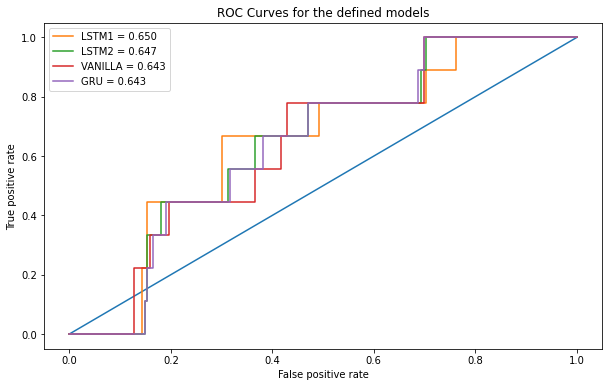

In [16]:
import matplotlib.pyplot as plt

##LSTM1
false_pos_rate_lstm1, true_pos_rate_lstm1, thresholds_lstm1 = roc_curve(error_df_lstm1.True_class, error_df_lstm1.Reconstruction_error)
roc_auc_lstm1 = auc(false_pos_rate_lstm1, true_pos_rate_lstm1,)

##LSTM2
false_pos_rate_lstm2, true_pos_rate_lstm2, thresholds_lstm2 = roc_curve(error_df_lstm2.True_class, error_df_lstm2.Reconstruction_error)
roc_auc_lstm2 = auc(false_pos_rate_lstm2, true_pos_rate_lstm2,)

##VANILLA
false_pos_rate_vanilla, true_pos_rate_vanilla, thresholds_vanilla = roc_curve(error_df_vanilla.True_class, error_df_vanilla.Reconstruction_error)
roc_auc_vanilla = auc(false_pos_rate_vanilla, true_pos_rate_vanilla,)

##GRU
false_pos_rate_gru, true_pos_rate_gru, thresholds_gru = roc_curve(error_df_gru.True_class, error_df_gru.Reconstruction_error)
roc_auc_gru = auc(false_pos_rate_gru, true_pos_rate_gru,)



plt.figure(figsize=(10,6))

plt.plot([0, 1], [0, 1])
plt.plot(false_pos_rate_lstm1, true_pos_rate_lstm1, label='LSTM1 = %0.3f'% roc_auc_lstm1)
plt.plot(false_pos_rate_lstm2, true_pos_rate_lstm2, label='LSTM2 = %0.3f'% roc_auc_lstm2)
plt.plot(false_pos_rate_vanilla, true_pos_rate_vanilla, label='VANILLA = %0.3f'% roc_auc_vanilla)
plt.plot(false_pos_rate_gru, true_pos_rate_gru, label='GRU = %0.3f'% roc_auc_gru)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curves for the defined models')
plt.legend(loc='best')
plt.show()

## RECALL VS PRECISION THRESHOLDING

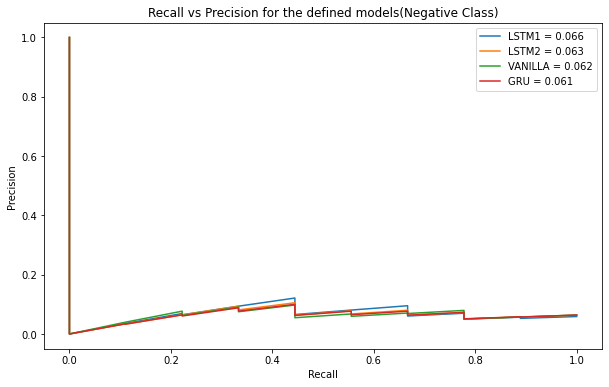

In [18]:

##LSTM1
precision_lstm1, recall_lstm1, threshold_lstm1 = precision_recall_curve(error_df_lstm1.True_class, error_df_lstm1.Reconstruction_error)
pr_auc_lstm1 = auc(recall_lstm1, precision_lstm1,)

##LSTM2
precision_lstm2, recall_lstm2, threshold_lstm2 = precision_recall_curve(error_df_lstm2.True_class, error_df_lstm2.Reconstruction_error)
pr_auc_lstm2 = auc(recall_lstm2, precision_lstm2,)

##VANILLA
precision_vanilla, recall_vanilla, threshold_vanilla = precision_recall_curve(error_df_vanilla.True_class, error_df_vanilla.Reconstruction_error)
pr_auc_vanilla = auc(recall_vanilla, precision_vanilla,)

##GRU
precision_gru, recall_gru, threshold_gru = precision_recall_curve(error_df_gru.True_class, error_df_gru.Reconstruction_error)
pr_auc_gru = auc(recall_gru, precision_gru,)


plt.figure(figsize=(10,6))

plt.plot(recall_lstm1, precision_lstm1, label='LSTM1 = %0.3f'% pr_auc_lstm1)
plt.plot(recall_lstm2, precision_lstm2, label='LSTM2 = %0.3f'% pr_auc_lstm2)
plt.plot(recall_vanilla, precision_vanilla, label='VANILLA = %0.3f'% pr_auc_vanilla)
plt.plot(recall_gru, precision_gru, label='GRU = %0.3f'% pr_auc_gru)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Recall vs Precision for the defined models(Negative Class)')
plt.legend(loc='best')
plt.show()


## Reconstruction Error vs Threshold Check

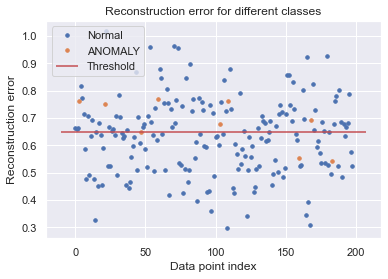

In [72]:
threshold_fixed = 0.65
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "ANOMALY" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()



## Confusion Matrix

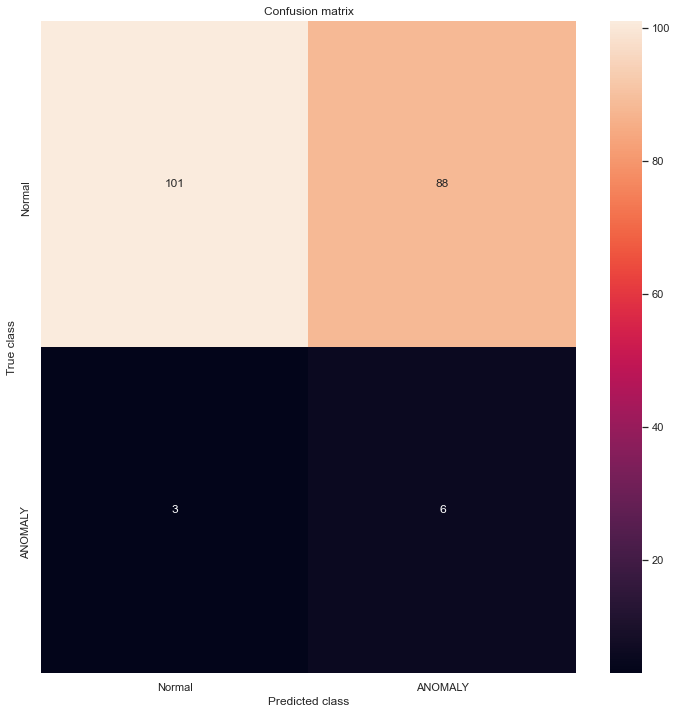

In [73]:
LABELS = ["Normal","ANOMALY"]

pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_class, pred_y)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()



## MODEL STATS

In [79]:
def print_stats(ytest, ypred):
    print("Accuracy: {:.5f}, Cohen's Kappa Score: {:.5f}".format(
        accuracy_score(ytest, ypred), 
        cohen_kappa_score(ytest, ypred, weights="quadratic")))
    ll = log_loss(ytest, ypred)
    print("Log Loss: {}".format(ll))
    print(' ')
    print("Confusion Matrix:")
    print(confusion_matrix(ytest, ypred))
    print("Classification Report:")
    print(classification_report(ytest, ypred))

In [80]:
print_stats(error_df.True_class, pred_y)

Accuracy: 0.89394, Cohen's Kappa Score: -0.05479
Log Loss: 3.6632520174862964
 
Confusion Matrix:
[[177  12]
 [  9   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       189
           1       0.00      0.00      0.00         9

    accuracy                           0.89       198
   macro avg       0.48      0.47      0.47       198
weighted avg       0.91      0.89      0.90       198



In [81]:
p = precision_score(error_df.True_class, pred_y,average='weighted')
r = recall_score(error_df.True_class, pred_y,average='weighted')
f = fbeta_score(error_df.True_class, pred_y, beta= 1,average='weighted')
print('Result: p=%.3f, r=%.3f, f=%.3f' % (p, r, f))

Result: p=0.908, r=0.894, f=0.901


In [82]:
print("------------------------------------------------------------------------------")
for threshold_fixed in [0.5, 0.6, 0.65, 0.7, 0.75, 0.85]:
    pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
    conf_matrix = confusion_matrix(error_df.True_class, pred_y)
    #print(conf_matrix)
    p = precision_score(error_df.True_class, pred_y, average='weighted')
    r = recall_score(error_df.True_class, pred_y,average='weighted')
    f = fbeta_score(error_df.True_class, pred_y, beta= 1, average='weighted')
    print('Result: p=%.3f, r=%.3f, f=%.3f' % (p, r, f))
    print('Threshold fixed=%.3f' % threshold_fixed)
    print_stats(error_df.True_class, pred_y)
    print("------------------------------------------------------------------------------")

------------------------------------------------------------------------------
Result: p=0.957, r=0.207, f=0.281
Threshold fixed=0.500
Accuracy: 0.20707, Cohen's Kappa Score: 0.01819
Log Loss: 27.38744156968443
 
Confusion Matrix:
[[ 32 157]
 [  0   9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.17      0.29       189
           1       0.05      1.00      0.10         9

    accuracy                           0.21       198
   macro avg       0.53      0.58      0.20       198
weighted avg       0.96      0.21      0.28       198

------------------------------------------------------------------------------
Result: p=0.932, r=0.404, f=0.533
Threshold fixed=0.600
Accuracy: 0.40404, Cohen's Kappa Score: 0.02333
Log Loss: 20.584183676269507
 
Confusion Matrix:
[[ 73 116]
 [  2   7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.39      0.55       189
         